## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [38]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [39]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path('./Resources/bitstamp.csv'),
                            index_col='Timestamp',
                            parse_dates=True,
                            infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [40]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [41]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path('./Resources/coinbase.csv'),
                       index_col="Timestamp",
                       parse_dates=True,
                       infer_datetime_format=True)

In [42]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [43]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [44]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace('$', '')

/Users/andrewisrael/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [45]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype('float')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [46]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum() # no duplicates, no need to drop any rows

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [47]:
# Repeat Steps 1–4 for the coinbase DataFrame

# Drop NaN
coinbase = coinbase.dropna()

# Replace '$' in Close col
coinbase['Close'] = coinbase['Close'].str.replace('$', '')

# Convert type to float in Close col
coinbase['Close'] = coinbase['Close'].astype('float')

# Check for duplicates
coinbase.duplicated().sum() # no duplicates so no need to drop any
                            



/Users/andrewisrael/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [55]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, 'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [56]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, 'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [58]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [59]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp BTC Prices'}, xlabel='Timestamp', ylabel='BTC Price ($)'>

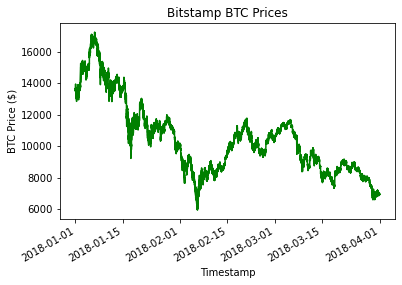

In [61]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(title='Bitstamp BTC Prices', xlabel="Timestamp", ylabel="BTC Price ($)", color="green")

<AxesSubplot:title={'center':'Coinbase BTC Prices'}, xlabel='Timestamp', ylabel='BTC Price ($)'>

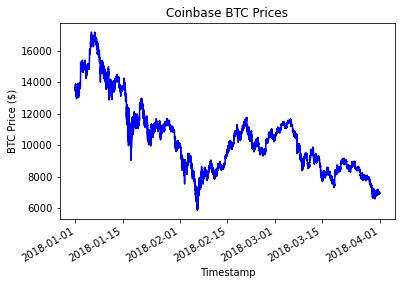

In [63]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(title='Coinbase BTC Prices', xlabel="Timestamp", ylabel="BTC Price ($)", color="blue")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase BTC Prices'}, xlabel='Timestamp', ylabel='BTC Price ($)'>

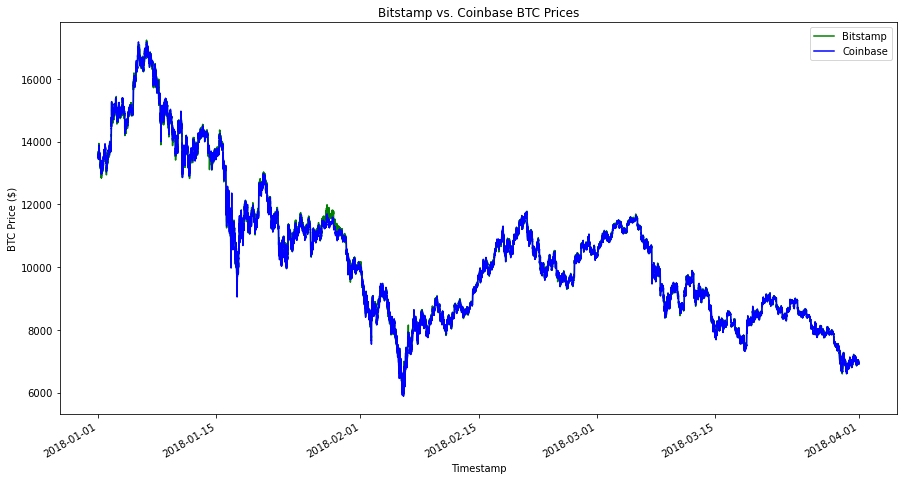

In [66]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(title='Bitstamp vs. Coinbase BTC Prices, January - March 2018', figsize=(15, 8), xlabel="Timestamp", ylabel="BTC Price ($)", color="green", 
                    legend=True, label='Bitstamp')
coinbase_sliced.plot(color="blue", legend=True, label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase BTC Prices, January 2018'}, xlabel='Timestamp', ylabel='BTC Price ($)'>

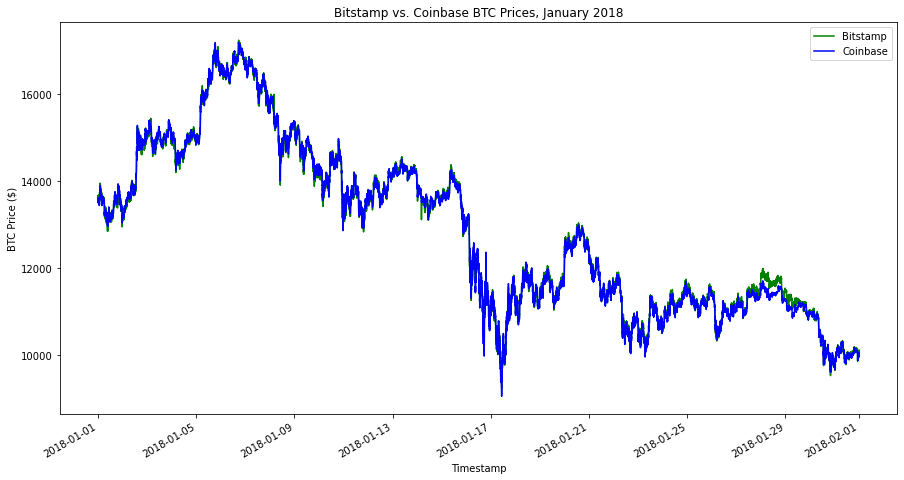

In [70]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

# Choose January 2018 as the 1-month period
bitstamp_jan_2018 = bitstamp_sliced.loc['2018-01-01':'2018-01-31']
coinbase_jan_2018 = coinbase_sliced.loc['2018-01-01':'2018-01-31']

bitstamp_jan_2018.plot(title='Bitstamp vs. Coinbase BTC Prices, January 2018', figsize=(15, 8), xlabel="Timestamp", ylabel="BTC Price ($)", color="green", 
                    legend=True, label='Bitstamp')
coinbase_jan_2018.plot(color="blue", legend=True, label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase BTC Prices, March 2018'}, xlabel='Timestamp', ylabel='BTC Price ($)'>

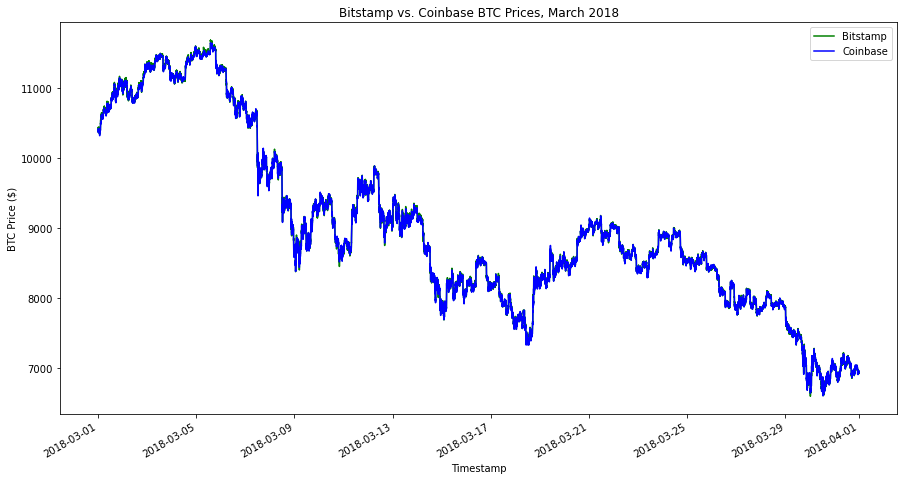

In [71]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

# Choose March 2018 as the 1-month period
bitstamp_mar_2018 = bitstamp_sliced.loc['2018-03-01':'2018-03-31']
coinbase_mar_2018 = coinbase_sliced.loc['2018-03-01':'2018-03-31']

bitstamp_mar_2018.plot(title='Bitstamp vs. Coinbase BTC Prices, March 2018', figsize=(15, 8), xlabel="Timestamp", ylabel="BTC Price ($)", color="green", 
                    legend=True, label='Bitstamp')
coinbase_mar_2018.plot(color="blue", legend=True, label='Coinbase')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Purely based on the visualizations above, it appears that the spread was tighter in March relative to January. In general, the spread in both periods appears to be relatively tight, aside from a few dates (January 27-29) in the earlier sample. However, in March, no such widening of the spread occurs throughout the month. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase BTC Prices, January 28 2018'}, xlabel='Timestamp', ylabel='BTC Price ($)'>

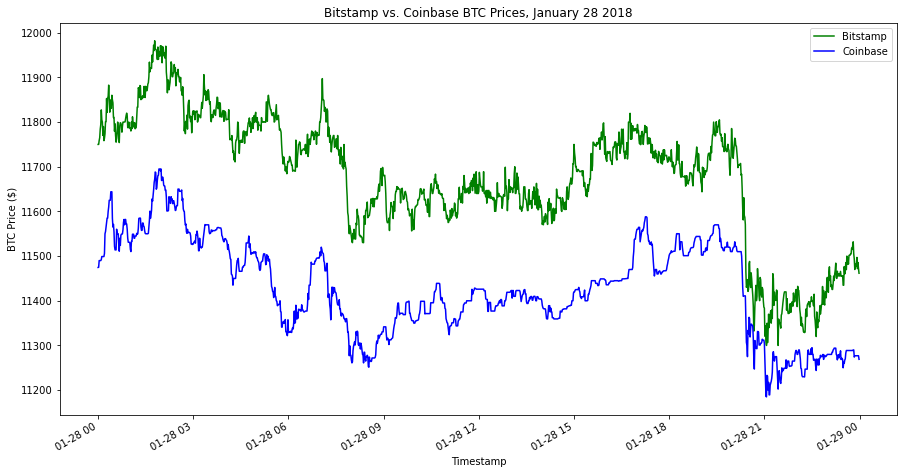

In [73]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

# Choose January 28, 2018 as the early date
bitstamp_jan_28 = bitstamp_sliced.loc['2018-01-28']
coinbase_jan_28 = coinbase_sliced.loc['2018-01-28']

# Plot the data
bitstamp_jan_28.plot(title='Bitstamp vs. Coinbase BTC Prices, January 28 2018', figsize=(15, 8), xlabel="Timestamp", ylabel="BTC Price ($)", color="green", 
                    legend=True, label='Bitstamp')
coinbase_jan_28.plot(color="blue", legend=True, label='Coinbase')

In [74]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_jan_28 - coinbase_jan_28

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread on January 28, 2018'}>

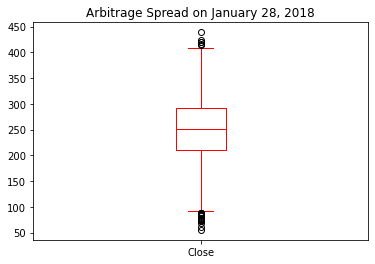

In [78]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', title="Arbitrage Spread on January 28, 2018", color="red")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase BTC Prices, February 12 2018'}, xlabel='Timestamp', ylabel='BTC Price ($)'>

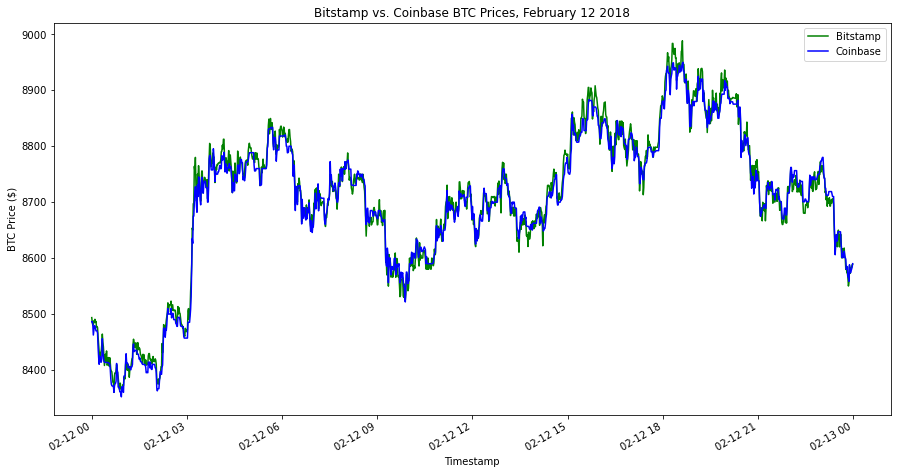

In [79]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

# Choose February 12 as the middle date
bitstamp_feb_12 = bitstamp_sliced.loc['2018-02-12']
coinbase_feb_12 = coinbase_sliced.loc['2018-02-12']

bitstamp_feb_12.plot(title='Bitstamp vs. Coinbase BTC Prices, February 12 2018', figsize=(15, 8), xlabel="Timestamp", ylabel="BTC Price ($)", color="green", 
                    legend=True, label='Bitstamp')
coinbase_feb_12.plot(color="blue", legend=True, label='Coinbase')

In [80]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_feb_12 - coinbase_feb_12

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean        4.041198
std        13.622551
min       -38.030000
25%        -5.377500
50%         4.730000
75%        13.320000
max        64.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread on January 28, 2018'}>

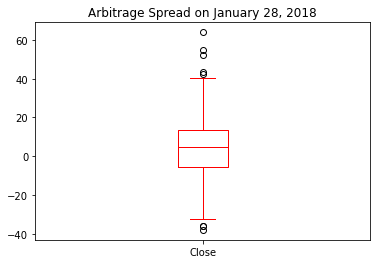

In [81]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', title="Arbitrage Spread on February 12, 2018", color="red")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase BTC Prices, March 31 2018'}, xlabel='Timestamp', ylabel='BTC Price ($)'>

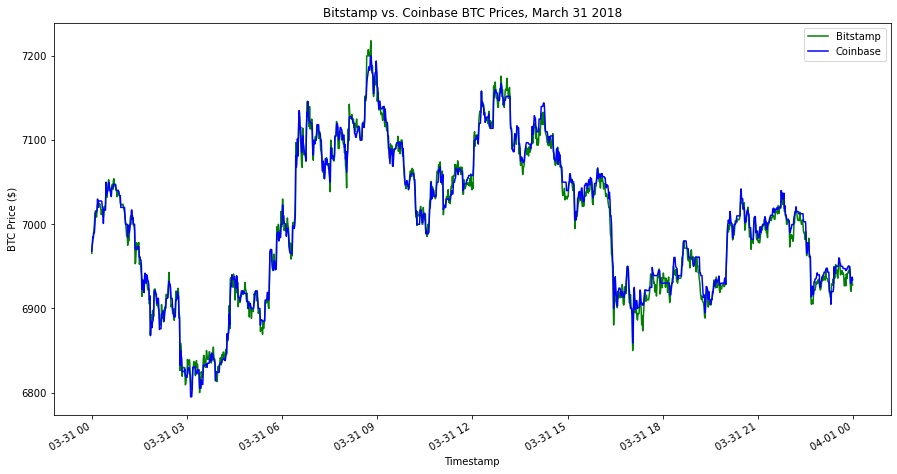

In [83]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

# Choose March 31 as the late date
bitstamp_mar_31 = bitstamp_sliced.loc['2018-03-31']
coinbase_mar_31 = coinbase_sliced.loc['2018-03-31']

bitstamp_mar_31.plot(title='Bitstamp vs. Coinbase BTC Prices, March 31 2018', figsize=(15, 8), xlabel="Timestamp", ylabel="BTC Price ($)", color="green", 
                    legend=True, label='Bitstamp')
coinbase_mar_31.plot(color="blue", legend=True, label='Coinbase')

In [84]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_mar_31 - coinbase_mar_31

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1434.000000
mean       -2.348675
std         8.109623
min       -35.980000
25%        -7.627500
50%        -2.300000
75%         2.537500
max        35.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread on March 31, 2018'}>

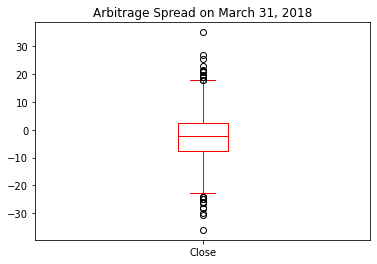

In [85]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title="Arbitrage Spread on March 31, 2018", color="red")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [91]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

# Going off the summary stats above and assuming "higher-priced one" means the exchange that makes the mean arbitrage spread >0, we have
# Bitstamp as the "higher-priced" exchange for 1/28 and 2/12, and Coinbase for 3/31
arbitrage_spread_early = bitstamp_jan_28 - coinbase_jan_28
arbitrage_spread_middle = bitstamp_feb_12 - coinbase_feb_12
arbitrage_spread_late = coinbase_mar_31 - bitstamp_mar_31

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame

# For the early date (Jan 28, 2018):
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [90]:
# Summary of the middle date (Feb 12, 2018)
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe()

count    881.000000
mean      12.666039
std        8.755458
min        0.010000
25%        5.920000
50%       11.040000
75%       17.280000
max       64.000000
Name: Close, dtype: float64

In [89]:
# Summary of the late date (Mar 31, 2018)
arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    913.000000
mean       7.013461
std        5.438677
min        0.010000
25%        2.680000
50%        6.010000
75%       10.000000
max       35.980000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [94]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

# As above, use Coinbase for first 2 (lower priced), and Bitstamp for the latest period.
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_jan_28[arbitrage_spread_early > 0]
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / coinbase_feb_12[arbitrage_spread_middle > 0]
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp_mar_31[arbitrage_spread_late > 0]

# Review the spread return DataFrame

# Early
spread_return_early.describe()

count    1436.000000
mean        0.021648
std         0.005961
min         0.004885
25%         0.018369
50%         0.021897
75%         0.025292
max         0.038510
Name: Close, dtype: float64

In [95]:
# Middle
spread_return_middle.describe()

count    881.000000
mean       0.001454
std        0.000998
min        0.000001
25%        0.000682
50%        0.001272
75%        0.002002
max        0.007356
Name: Close, dtype: float64

In [96]:
# Late
spread_return_late.describe()

count    913.000000
mean       0.001003
std        0.000780
min        0.000001
25%        0.000383
50%        0.000864
75%        0.001434
max        0.005167
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [98]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

# From the above summary statistics, we can look at the "max" field to determine if any positive return trades are available in the sample.
# For the early date, the max spread is 3.85%, so we know there will be at least 1 profitable trade
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

# For the middle and late dates, the max spreads are 0.7% and 0.5% respectively, so there will be no profitable trades in either sample. 

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [99]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [105]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_jan_28[arbitrage_spread_early > .01]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
display(profit_per_trade_early)

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [106]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Arbitrage Trade on January 28, 2018'}, xlabel='Timestamp', ylabel='Profit Per Trade ($)'>

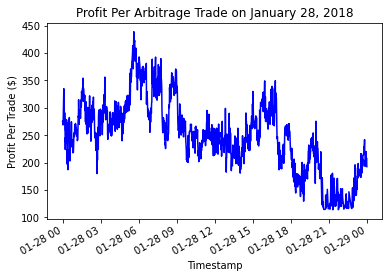

In [107]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title="Profit Per Arbitrage Trade on January 28, 2018", label='Timestamp', ylabel="Profit Per Trade ($)", 
                            color="blue")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [108]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
sum(profit_per_trade_early)

# For the other 2 dates (middle + late), given there were no profitable trades, there will be 0 profit on each day. 

349918.2899999996

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [110]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Arbitrage Trading P&L on January 28, 2018'}, xlabel='Timestamp', ylabel='Cumulative Profit ($)'>

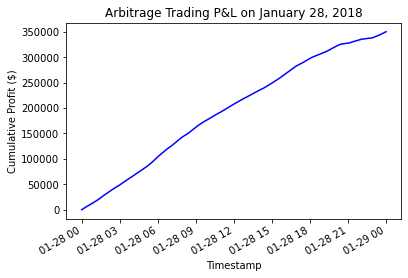

In [111]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title="Arbitrage Trading P&L on January 28, 2018", color="blue", xlabel="Timestamp", ylabel="Cumulative Profit ($)")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Given there were no arbitrage profits in the later 2 dates and the arbitrage profit on the early date reached over \$350,000. It seems like an arbitrage opportunity existed between these 2 exchanges in early 2018, but dissipated as the year went on.